In [1]:
# Importo librerías
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
# Generación de datos de muestra
X = np.sort(10 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()
# Añado ruido a la salida
y[::5] += 2 * (0.5 - np.random.rand(20))

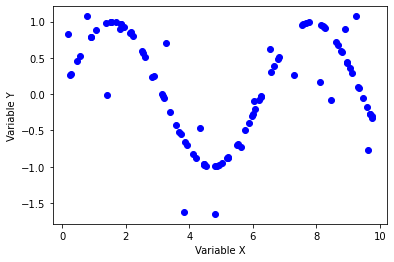

In [3]:
plt.scatter(X, y, color = 'blue')   
plt.xlabel('Variable X') 
plt.ylabel('Variable Y') 
plt.show()

En el siguiente código se generan tres modelos diferentes: uno con un kernel rbf, otro con kernel lineal y otro con kernel polinómico de grado tres. Los datos siguen una forma no lineal, por lo que, previsiblemente el kernel lineal no se comporte correctamente.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [4]:
# Ajuste del modelo de regresión
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

svr_lin = SVR(kernel='linear', C=100, gamma='auto')

svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

In [5]:
# Análisis de los resultados
lw = 2

In [6]:
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

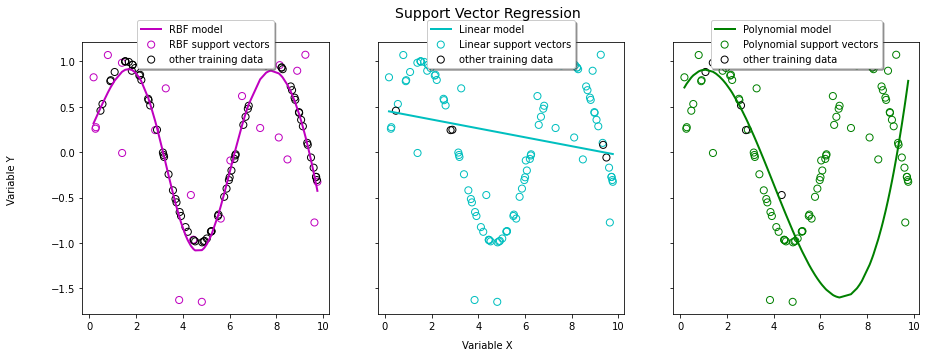

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

for ix, svr in enumerate(svrs):
    
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    
    
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'Variable X', ha='center', va='center')
fig.text(0.06, 0.5, 'Variable Y', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

Se cumple lo que se preveía, el kernel lineal tiene un mal rendimiento en estos datos. El kernel polinómico de grado tres en una parte de los datos se ajusta correctamente y en otra no. Por último, el kernel RBF o Gaussiano se ajusta muy bien a los datos en toda la forma. Como norma general se debería utilizar el kernel RBF ya que se ajusta correctamente a casi cualquier función

## Modelos originales

In [8]:
from sklearn.metrics import  r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [9]:
# Normalizamos las features con StandardScaler
scaler = StandardScaler()

X_normalizadas = scaler.fit_transform(X)

In [10]:
# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X_normalizadas,y, 
                                                    test_size=0.25,
                                                    random_state=0)

#Kernel RBF

In [11]:
svr_rbf = SVR(verbose=True)

svr_rbf.fit(X_train, y_train)

[LibSVM]

SVR(verbose=True)

In [12]:
# Obtenemos las predicciones de y_test
y_pred = svr_rbf.predict(X_test)

In [13]:
# Umbralizamos
umbral = 0.6
svr_y_test_umbralizada = 1 * (y_pred[:, ] > umbral)

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [15]:
# Obtengo las métricas en train y en test
from sklearn.metrics import r2_score
svr_y_train_pred = svr_rbf.predict(X_train)
svr_y_test_pred = svr_rbf.predict(X_test)
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(y_train, svr_y_train_pred),2)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(y_test, svr_y_test_pred),2)))

La R^2 en los datos de train es: 0.87
La R^2 en los datos de test es: 0.81


#Kernel LIN

In [16]:
svr_lin.fit(X_train, y_train)

y_pred_lin = svr_lin.predict(X_test)

In [17]:
# Umbralizamos
umbral = 0.6
svr_lin_y_test_umbralizada = 1 * (y_pred_lin[:, ] > umbral)

In [18]:
# Obtengo las métricas en train y en test

svr_lin_y_train_pred = svr_lin.predict(X_train)
svr_lin_y_test_pred = svr_lin.predict(X_test)
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(y_train, svr_lin_y_train_pred),2)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(y_test, svr_lin_y_test_pred),2)))

La R^2 en los datos de train es: 0.0
La R^2 en los datos de test es: 0.04


#Kernel POLY

In [19]:
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1, verbose = True)

svr_poly.fit(X_train, y_train)

y_pred_ply = svr_poly.predict(X_test)

[LibSVM]

In [20]:
# Umbralizamos
umbral = 0.6
svr_poly_y_test_umbralizada = 1 * (y_pred_ply[:, ] > umbral)

In [21]:
# Obtengo las métricas en train y en test

svr_poly_y_train_pred = svr_poly.predict(X_train)
svr_poly_y_test_pred = svr_poly.predict(X_test)
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(y_train, svr_poly_y_train_pred),2)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(y_test, svr_poly_y_test_pred),2)))

La R^2 en los datos de train es: 0.22
La R^2 en los datos de test es: -0.37
